# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Data Preprocessing

### Data Collection

In [2]:
df = pd.read_csv('data/credit_score.csv')

In [3]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [4]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


### Data Cleansing

#### Define target

In [5]:
target = 'Credit Score'

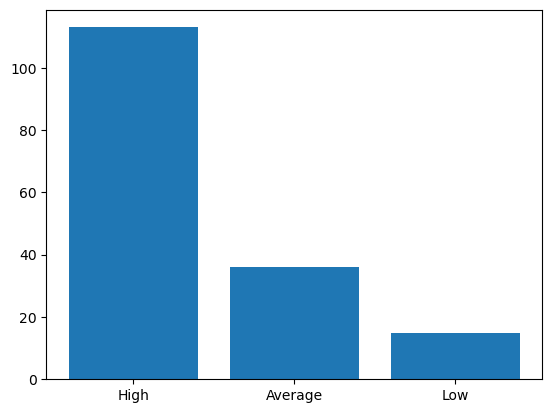

In [6]:
target_count = df[target].value_counts()
plt.bar(target_count.index.astype(str), target_count.values)
plt.show()

#### Transform target

In [7]:
df['High Credit'] = df['Credit Score'].apply(lambda x: 1 if x == 'High' else 0)
df = df.drop(columns='Credit Score')

In [8]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,High Credit
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,1
1,30,Male,100000,Master's Degree,Married,2,Owned,1
2,35,Female,75000,Doctorate,Married,1,Owned,1
3,40,Male,125000,High School Diploma,Single,0,Owned,1
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,1
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,0
160,34,Male,47500,Associate's Degree,Single,0,Rented,0
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,1
162,44,Male,87500,Master's Degree,Single,0,Owned,1


In [9]:
target = 'High Credit'

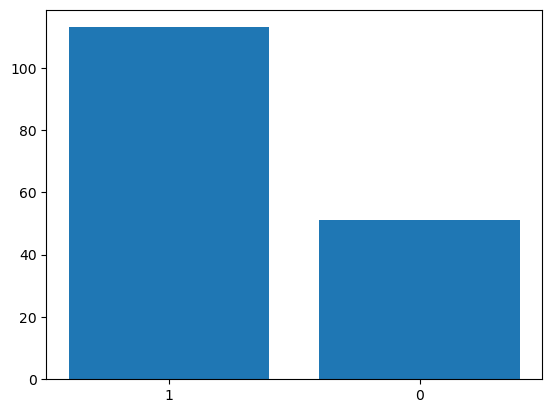

In [10]:
target_count = df[target].value_counts()
plt.bar(target_count.index.astype(str), target_count.values)
plt.show()

#### Check data type

In [11]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
High Credit            int64
dtype: object

#### Clean missing value

In [12]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
High Credit           0
dtype: int64

#### Transform categorical columns

##### Normianl

In [13]:
nominal_cols = ['Gender', 'Marital Status', 'Home Ownership']
df = pd.get_dummies(df, columns=nominal_cols, prefix=nominal_cols, drop_first=True)

In [14]:
df

,Age,Income,Education,Number of Children,High Credit,Gender_Male,Marital Status_Single,Home Ownership_Rented
0,25,50000,Bachelor's Degree,0,1,False,True,True
1,30,100000,Master's Degree,2,1,True,False,False
2,35,75000,Doctorate,1,1,False,False,False
3,40,125000,High School Diploma,0,1,True,True,False
4,45,100000,Bachelor's Degree,3,1,False,False,False
...,...,...,...,...,...,...,...,...
159,29,27500,High School Diploma,0,0,False,True,True
160,34,47500,Associate's Degree,0,0,True,True,True
161,39,62500,Bachelor's Degree,2,1,False,False,False
162,44,87500,Master's Degree,0,1,True,True,False


In [15]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [16]:
df

,Age,Income,Education,Number of Children,High Credit,Gender_Male,Marital Status_Single,Home Ownership_Rented
0,25,50000,Bachelor's Degree,0,1,0,1,1
1,30,100000,Master's Degree,2,1,1,0,0
2,35,75000,Doctorate,1,1,0,0,0
3,40,125000,High School Diploma,0,1,1,1,0
4,45,100000,Bachelor's Degree,3,1,0,0,0
...,...,...,...,...,...,...,...,...
159,29,27500,High School Diploma,0,0,0,1,1
160,34,47500,Associate's Degree,0,0,1,1,1
161,39,62500,Bachelor's Degree,2,1,0,0,0
162,44,87500,Master's Degree,0,1,1,1,0


##### Ordinal

In [17]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [18]:
education_order = {
    "High School Diploma": 0,
    "Associate's Degree": 1,
    "Bachelor's Degree": 2,
    "Master's Degree": 3,
    "Doctorate": 4,
}

df['Education'] = df['Education'].map(education_order)

In [19]:
df

,Age,Income,Education,Number of Children,High Credit,Gender_Male,Marital Status_Single,Home Ownership_Rented
0,25,50000,2,0,1,0,1,1
1,30,100000,3,2,1,1,0,0
2,35,75000,4,1,1,0,0,0
3,40,125000,0,0,1,1,1,0
4,45,100000,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...
159,29,27500,0,0,0,0,1,1
160,34,47500,1,0,0,1,1,1
161,39,62500,2,2,1,0,0,0
162,44,87500,3,0,1,1,1,0


#### Assign target and features

In [20]:
features = [x for x in df.columns if x != target]

In [21]:
features

['Age',
 'Income',
 'Education',
 'Number of Children',
 'Gender_Male',
 'Marital Status_Single',
 'Home Ownership_Rented']

In [22]:
y = df[target]
X = df[features]

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
159    0
160    0
161    1
162    1
163    1
Name: High Credit, Length: 164, dtype: int64

In [24]:
X

,Age,Income,Education,Number of Children,Gender_Male,Marital Status_Single,Home Ownership_Rented
0,25,50000,2,0,0,1,1
1,30,100000,3,2,1,0,0
2,35,75000,4,1,0,0,0
3,40,125000,0,0,1,1,0
4,45,100000,2,3,0,0,0
...,...,...,...,...,...,...,...
159,29,27500,0,0,0,1,1
160,34,47500,1,0,1,1,1
161,39,62500,2,2,0,0,0
162,44,87500,3,0,1,1,0


### Split dataset

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train

,Age,Income,Education,Number of Children,Gender_Male,Marital Status_Single,Home Ownership_Rented
97,45,115000,2,3,0,0,0
11,51,135000,2,0,1,0,0
65,45,110000,2,3,0,0,0
86,34,47500,1,0,1,1,1
6,26,40000,1,0,0,1,1
...,...,...,...,...,...,...,...
71,46,97500,0,1,0,0,0
106,32,57500,1,0,1,1,1
14,37,70000,2,2,0,0,0
92,35,85000,4,1,0,0,0


In [27]:
y_train

97     1
11     1
65     1
86     0
6      0
      ..
71     1
106    0
14     1
92     1
102    1
Name: High Credit, Length: 114, dtype: int64

### Feature selection

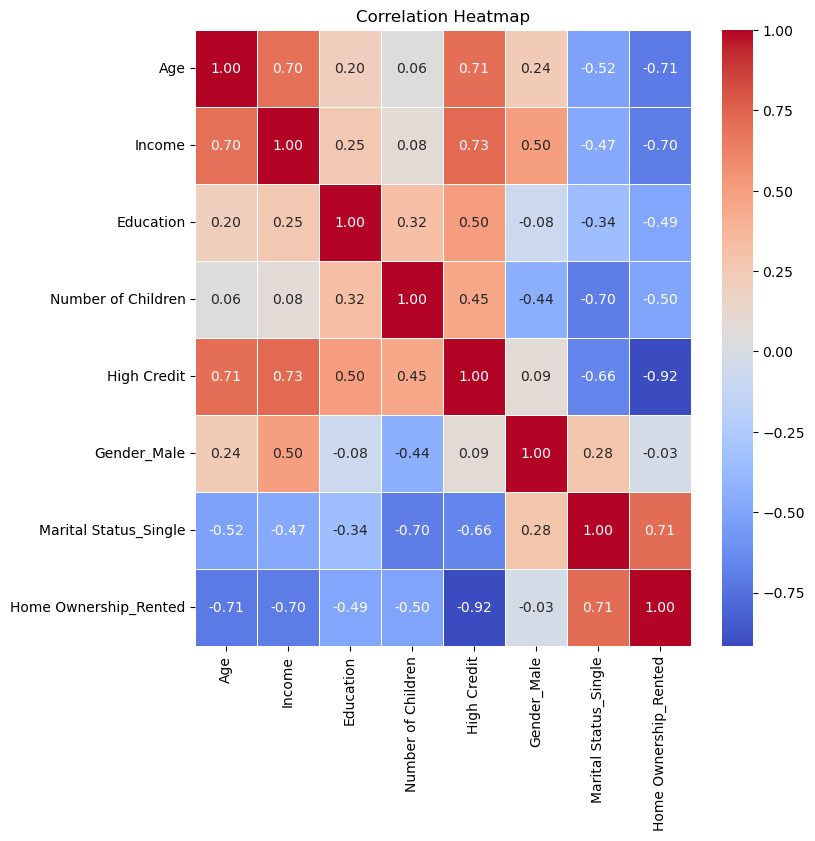

In [28]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
features = ['Age', 'Income', 'Education', 'Number of Children', 'Marital Status_Single', 'Home Ownership_Rented']

In [30]:
X_train = X_train[features]
X_test = X_test[features]

In [31]:
X_train

,Age,Income,Education,Number of Children,Marital Status_Single,Home Ownership_Rented
97,45,115000,2,3,0,0
11,51,135000,2,0,0,0
65,45,110000,2,3,0,0
86,34,47500,1,0,1,1
6,26,40000,1,0,1,1
...,...,...,...,...,...,...
71,46,97500,0,1,0,0
106,32,57500,1,0,1,1
14,37,70000,2,2,0,0
92,35,85000,4,1,0,0


### Feature engineering

#### Standardization

In [32]:
scaler = StandardScaler()

In [33]:
train_index = X_train.index
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_train_scale.index = train_index

In [34]:
X_train_scale

,Age,Income,Education,Number of Children,Marital Status_Single,Home Ownership_Rented
97,0.775933,0.902432,-0.019724,2.663913,-0.982607,-0.665611
11,1.497044,1.526782,-0.019724,-0.697926,-0.982607,-0.665611
65,0.775933,0.746344,-0.019724,2.663913,-0.982607,-0.665611
86,-0.546105,-1.204749,-0.769254,-0.697926,1.017700,1.502379
6,-1.507587,-1.438880,-0.769254,-0.697926,1.017700,1.502379
...,...,...,...,...,...,...
71,0.896118,0.356126,-1.518784,0.422687,-0.982607,-0.665611
106,-0.786475,-0.892574,-0.769254,-0.697926,1.017700,1.502379
14,-0.185549,-0.502355,-0.019724,1.543300,-0.982607,-0.665611
92,-0.425920,-0.034093,1.479335,0.422687,-0.982607,-0.665611


In [35]:
test_index = X_test.index
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=features)
X_test_scale.index = test_index

## Model

### First training

In [36]:
model = LogisticRegression()
model.fit(X_train_scale, y_train)

LogisticRegression()

In [37]:
model.intercept_[0]

2.802966852893966

In [38]:
pd.DataFrame({'feature':features, 'coef':model.coef_[0]})

,feature,coef
0,Age,0.570646
1,Income,1.100868
2,Education,0.977955
3,Number of Children,0.470098
4,Marital Status_Single,-0.602784
5,Home Ownership_Rented,-1.564883


In [39]:
model.predict(X_test_scale)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0])

In [40]:
model.predict_proba(X_test_scale)

array([[9.24583718e-01, 7.54162822e-02],
       [1.13587561e-03, 9.98864124e-01],
       [6.37170048e-02, 9.36282995e-01],
       [1.25724776e-02, 9.87427522e-01],
       [2.53872984e-03, 9.97461270e-01],
       [9.24583718e-01, 7.54162822e-02],
       [1.34853998e-03, 9.98651460e-01],
       [1.34853998e-03, 9.98651460e-01],
       [2.45356754e-03, 9.97546432e-01],
       [1.85644160e-02, 9.81435584e-01],
       [9.73286248e-01, 2.67137522e-02],
       [9.90463767e-01, 9.53623275e-03],
       [1.53691470e-02, 9.84630853e-01],
       [2.89190588e-04, 9.99710809e-01],
       [9.91241995e-01, 8.75800481e-03],
       [2.62533033e-03, 9.97374670e-01],
       [5.65187303e-01, 4.34812697e-01],
       [9.88302086e-01, 1.16979140e-02],
       [6.33511353e-03, 9.93664886e-01],
       [1.32539834e-03, 9.98674602e-01],
       [9.41486772e-03, 9.90585132e-01],
       [9.80017931e-01, 1.99820686e-02],
       [9.89254810e-01, 1.07451905e-02],
       [5.66373776e-03, 9.94336262e-01],
       [3.576149

In [41]:
y_pred_proba = model.predict_proba(X_test_scale)[:, 1]
residuals = y_test - y_pred_proba

### Check assumption

#### Linearity

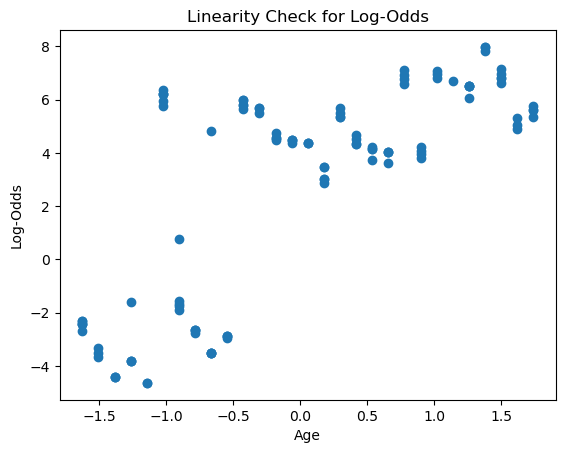

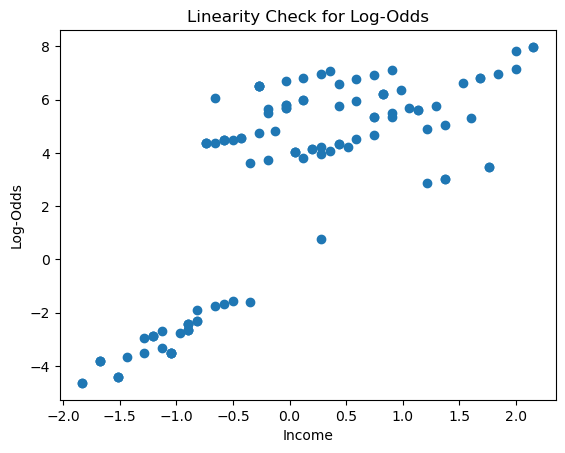

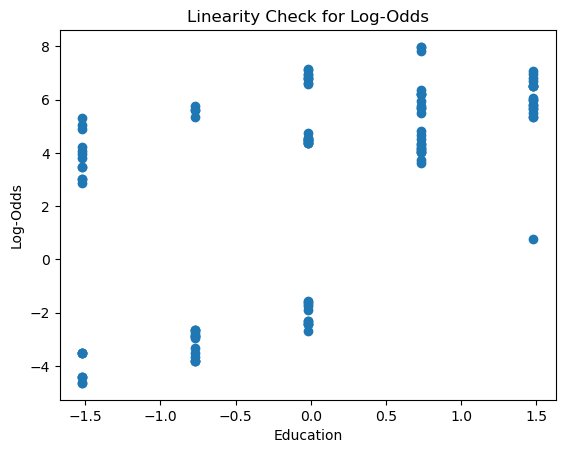

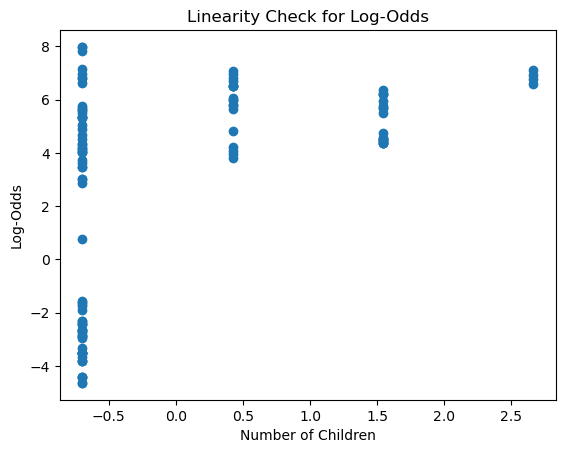

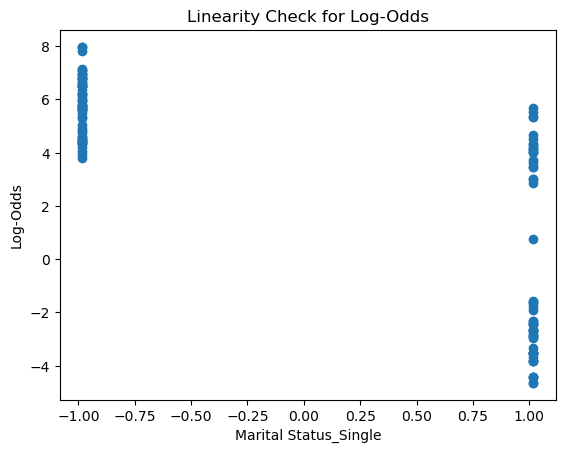

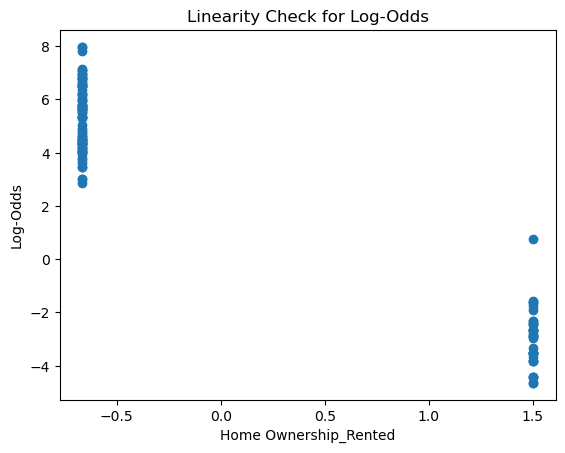

In [42]:
y_pred_proba = model.predict_proba(X_train_scale)[:, 1]

log_odds = np.log(y_pred_proba / (1 - y_pred_proba))

for feature in features:
    plt.scatter(X_train_scale[feature], log_odds)
    plt.xlabel(feature)
    plt.ylabel('Log-Odds')
    plt.title('Linearity Check for Log-Odds')
    plt.show()

#### Independence

In [43]:
dw_test = durbin_watson(residuals)
print(f"Durbin-Watson test statistic: {dw_test}")

Durbin-Watson test statistic: 1.8076579447571162


#### Multicollinearity

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_scale[features].columns
vif['VIF'] = [variance_inflation_factor(X_train_scale[features], i) for i in range(len(X_train_scale[features].columns))]
print(vif)

                Features       VIF
0                    Age  3.724207
1                 Income  2.910716
2              Education  1.346730
3     Number of Children  3.663559
4  Marital Status_Single  3.582352
5  Home Ownership_Rented  6.045121


#### Large sample size

In [45]:
df[target].value_counts()

High Credit
1    113
0     51
Name: count, dtype: int64

In [46]:
df[target].value_counts()[0] / len(features)

8.5

### Final training

In [47]:
model = LogisticRegression(penalty='l2')
model.fit(X_train_scale, y_train)

LogisticRegression()

In [48]:
model.intercept_[0]

2.802966852893966

In [49]:
pd.DataFrame({'feature':features, 'coef':model.coef_[0]})

,feature,coef
0,Age,0.570646
1,Income,1.100868
2,Education,0.977955
3,Number of Children,0.470098
4,Marital Status_Single,-0.602784
5,Home Ownership_Rented,-1.564883


## Evaluate

In [50]:
y_pred_train = model.predict(X_train_scale)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        81

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [51]:
y_pred_test = model.predict(X_test_scale)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.94      0.97      0.95        32

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.93        50
weighted avg       0.94      0.94      0.94        50



## Test run

In [52]:
input = {
    'Age': 48,
    'Income': 82500,
    'Education': 4,
    'Number of Children': 1,
    'Marital Status_Single': 0,
    'Home Ownership_Rented': 0
}

In [53]:
input_df = pd.DataFrame(input, index=[0])

In [54]:
input_df

,Age,Income,Education,Number of Children,Marital Status_Single,Home Ownership_Rented
0,48,82500,4,1,0,0


In [55]:
input_df = pd.DataFrame(scaler.transform(input_df), columns=features)

In [56]:
input_df

,Age,Income,Education,Number of Children,Marital Status_Single,Home Ownership_Rented
0,1.136489,-0.112137,1.479335,0.422687,-0.982607,-0.665611


In [57]:
model.predict(input_df)

array([1])

In [58]:
model.predict_proba(input_df)

array([[0.00134854, 0.99865146]])